<a href="https://colab.research.google.com/github/syedshubha/1MAT120/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integration
Topics covered:


1.   Integration using sympy
2.   Rectangular and trapezoid method (Including how to handle infinite limit)
3. Monte Carlo integration



In [ ]:
from numpy import *
from sympy import *
from matplotlib.pyplot import *
x, t = symbols("x t")

## $\int dx e^{3x}cos(4x)$

In [ ]:
integrate(exp(3*x)*cos(4*x),x)

4*exp(3*x)*sin(4*x)/25 + 3*exp(3*x)*cos(4*x)/25

# $\int_{0}^{\pi} dx e^{3x}cos(4x)$

In [ ]:
integrate(exp(3*x)*cos(4*x),(x,0, pi))

-3/25 + 3*exp(3*pi)/25

$\int_{-∞}^{∞} sin(x^2) dx$

In [ ]:
integrate(sin(x**2), (x,-oo, oo))

sqrt(2)*sqrt(pi)/2

## Factorial
$ n! = \int_{0}^{\infty} x^n e^{-x} dx$

In [ ]:
n = 0.5
f= x**n * exp(-x)
integrate(f,(x,0,oo))

0.886226925452758

In [ ]:
sqrt(pi/4).evalf()

0.886226925452758

So $(\frac{1}{2})! = \frac{\sqrt{\pi}}{2}$

## $\int_{-\infty}^{\infty} dx \frac{sin(x)}{x}$

In [ ]:
f = sin(x)/x
integrate(f,(x,-oo,oo))

pi

## $\int e^{x^2} dx$

In [ ]:
integrate(exp(x**2),x)

sqrt(pi)*erfi(x)/2

# Numerical Method

In [ ]:
integrate(x**x, (x, 0, 1))

Integral(x**x, (x, 0, 1))

So Sympy cannot evaluate this. But wolfram alpha can.
Solution: Use numerical or scipy.


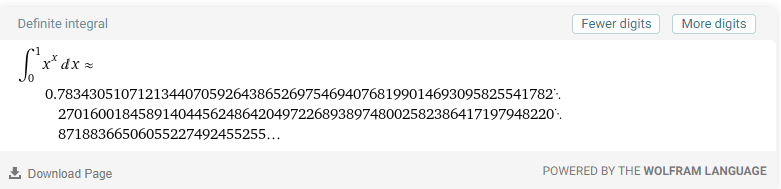

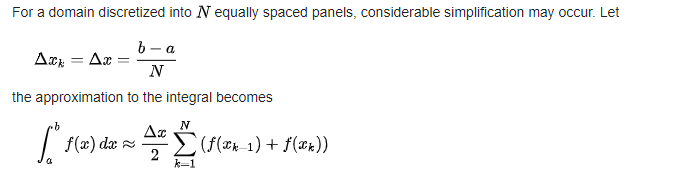

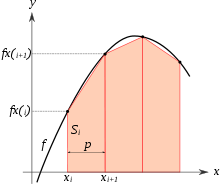

In [ ]:
def f(y):
  return y**y

# Trapezoid Rule

n = 1000
s = 0
a = 0
b = 1
h= (b-a)/n

for i in range(1,n+1):
  s = s + f(a+i*h)*h

print(s)

0.7834313348691375


Smaller $h$ will give more accurate result but consume more computation time.

## How to handle infinity?


1.   Take large upper limit $b$ and the riemann sum will converge
2.   Increase $b$ and calculate sum until the value has converged upto a point



### $$ \int_{1}^{\infty} \frac{1}{x^7} dx $$
(upto 3 decimal point)

In [ ]:
integrate(1/x**7 , (x,1,oo)).evalf(3)

0.167

In [ ]:
def y(z):
  return (1/z**7)

a= 1.0
h = 0.0001
var = 100.0 # To compare first time
b = 10


while True:
  n = int((b-a)/h)
  s = 0
  for i in range(n):
    s= s+ y(a+i*h)*h # Rectangle method

  if(abs(s-var)<0.0001):
    break;
  else:
    var = s
print(f"{s:.4f}")

0.1667


## The method above is not efficient enough. Can you reduce the complexity?

# Monte Carlo Method for Integration

An illustration of Monte Carlo integration. In this example, the domain D is the inner circle and the domain E is the square. Because the square's area (4) can be easily calculated, the area of the circle (π*1.02) can be estimated by the ratio (0.8) of the points inside the circle (40) to the total number of points (50), yielding an approximation for the circle's area of 4*0.8 = 3.2 ≈ π.

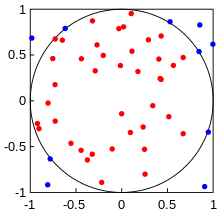

Pseudo-Random number \\
 $X_i= (a+bX_{i-1}) MOD \ m$

In [ ]:
seed = 3 # change the seed, the output will be different
x = 0

for i in range(5):
  x = (seed + x*6)%10
  print(x, end = " ")

3 1 9 7 5 

In [ ]:
from numpy.random import *
# seed(12)
# for fixed seed, output will be same
x = rand(6)
print(x) # output lies between 0 & 1

[0.00995687 0.87705766 0.79043974 0.4765294  0.27158979 0.16458249]


$\int_{0}^{1} e^x dx$

In [ ]:
from sympy import *
x = symbols('x')
integrate(exp(x), (x,0,1)).evalf()

1.71828182845905

In [ ]:
N = 9999 #large value will give more accurate result costing more computation time

x = rand(N)
temp = rand(N)
y = [e*i for i in temp]

points = [(x[i], y[i]) for i in range(N)]

z = [e**i for i in x]

n = 0
for i in range(N):
  if y[i] <= z[i]:
    n = n + 1
print(e*n/N)

1.720844481862762


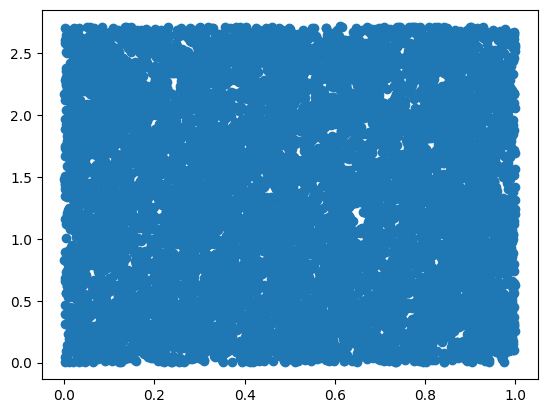

In [ ]:
from matplotlib.pyplot import *
scatter(x, y)

Evaluating $\pi$ using
$$ \pi = 4 \int_{0}^{1} dx\sqrt{1-x^2} $$

In [ ]:
N = 99999  #large value will give more accurate result costing more computation time
from numpy import sqrt

x = rand(N)
y = rand(N)


z = sqrt(1-x**2)

n = 0
for i in range(N):
  if y[i] <= z[i]:
    n = n + 1
print(4*n/N)

3.1410714107141073
